## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# columns: 
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no } 

cols = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']
nephritis = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv', names=cols)

In [0]:
nephritis.head()

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,no,yes,no,no,no,no
35,9,no,no,yes,yes,yes,no
35,9,no,yes,no,no,no,no
36,0,no,no,yes,yes,yes,no
36,0,no,yes,no,no,no,no


First, check for missing data and remove all rows containing missing data

In [0]:
# answer below:
nephritis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 41
Data columns (total 7 columns):
temp                 120 non-null int64
nausea               120 non-null object
lumbar_pain          120 non-null object
urine_pushing        120 non-null object
micturition_pains    120 non-null object
burning              120 non-null object
nephritis            120 non-null object
dtypes: int64(1), object(6)
memory usage: 7.5+ KB


In [0]:
nephritis.columns

Index(['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains',
       'burning', 'nephritis'],
      dtype='object')

To use the data, we must convert all columns to numeric. Do this using the `get_dummies` function for all non-numeric columns.

Note: remember to drop the first value.

In [0]:
# answer below:
dummy = pd.DataFrame()
dummy = pd.get_dummies(nephritis,columns=['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains',
       'burning', 'nephritis'],drop_first = True)
dummy.head()
nephritis1 = pd.concat([dummy], axis = 1)
nephritis1.head()

,temp,nausea_yes,lumbar_pain_yes,urine_pushing_yes,micturition_pains_yes,burning_yes,nephritis_yes
35,5,0,1,0,0,0,0
35,9,0,0,1,1,1,0
35,9,0,1,0,0,0,0
36,0,0,0,1,1,1,0
36,0,0,1,0,0,0,0


Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [0]:
# answer below:
X = nephritis1.drop(columns='nephritis_yes')
y = nephritis1['nephritis_yes']
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [0]:
# answer below:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5)
results = classifier.fit(X_train, y_train)
results.score(X_train,y_train)


0.9895833333333334

In [0]:
results.score(X_test,y_test)

0.9583333333333334

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [0]:
# answer below:
# Yes, this model slighly overfits given the 3% difference in train versus test score.

Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

In [0]:
# answer below:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(1,25,1)}

grid = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)

grid.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

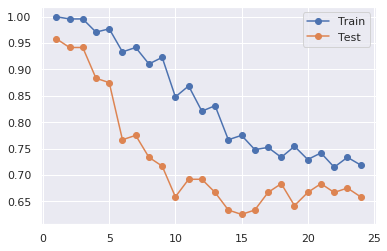

In [0]:
cv_r = pd.DataFrame(grid.cv_results_) 
import seaborn as sns
sns.set()

plt.plot(cv_r['param_n_neighbors'], cv_r['mean_train_score'], 'o-', label='Train') 
plt.plot(cv_r['param_n_neighbors'], cv_r['mean_test_score'], 'o-', label='Test') 
plt.legend() 
plt.show()

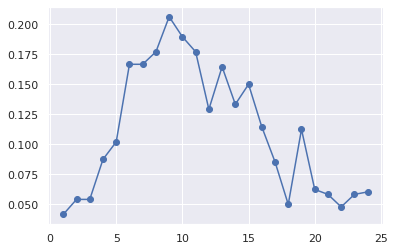

In [0]:
plt.plot(cv_r['param_n_neighbors'], cv_r['mean_train_score']- cv_r['mean_test_score'], 'o-', label='Train') 
plt.show()

# The optimal value for k is 3.